In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


# Amazon Case

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
df = pd.read_excel('SMU559-XLS-ENG.xlsx', sheet_name ='Raw Data')

We'll keep companies with 200 datapoints for the sake of simplicity, the rest might not be comparable.

In [3]:
df['company_v'].value_counts().loc[lambda x : x==200] #selección de empresas con 200 puntos

ZALORA          200
EBAY            200
AMAZON          200
QOO10           200
FAVE            200
CAROUSELL       200
TAOBAO/TMALL    200
Name: company_v, dtype: int64

In [4]:
df = df.groupby('company_v').filter(lambda x: len(x) == 200) 

In [5]:
df.head()

,uid,company_v,poverq,soverq,pq,satis,repur,recomm,Q19,VN_1009_Q20A,...,race,work,pincome,income,educat,childsupp,marital,gender,house,DOI
0,5,ZALORA,9,7,6,7,6,5,0,8,...,1,1,2,4,8,1,2,1,2,1/29/2018
1,11,FAVE,7,8,8,7,7,6,0,8,...,1,1,2,4,7,99,1,1,2,1/29/2018
2,15,FAVE,6,7,7,6,6,6,0,7,...,1,1,4,5,8,2,2,2,3,2018-01-02 00:00:00
3,19,AMAZON,8,8,7,8,8,6,0,8,...,1,1,3,5,8,2,2,2,3,2018-01-02 00:00:00
4,20,QOO10,7,6,8,8,6,5,0,7,...,1,1,4,5,8,2,2,1,3,2018-01-02 00:00:00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1599
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   uid                    1400 non-null   int64 
 1   company_v              1400 non-null   object
 2   poverq                 1400 non-null   int64 
 3   soverq                 1400 non-null   int64 
 4   pq                     1400 non-null   int64 
 5   satis                  1400 non-null   int64 
 6   repur                  1400 non-null   int64 
 7   recomm                 1400 non-null   int64 
 8   Q19                    1400 non-null   int64 
 9   VN_1009_Q20A           1400 non-null   int64 
 10  VN_1009_TP01           1400 non-null   int64 
 11  VN_1009_TP02           1400 non-null   int64 
 12  VN_1009_TP03           1400 non-null   int64 
 13  VN_1009_TP04           1400 non-null   int64 
 14  VN_1009_TP05           1400 non-null   int64 
 15  VN_1009_TP06         

1. Companies often benchmark themselves on various key performance indicators’ ratings. How does Amazon.com perform on these key metrics as compared to its competitors? 

 - Customer Satisfaction - satis
 - Willingness to Recommend - recomm
 - Average customer spend - Q9D
 - Frequency of visit - Q9C_P


In [7]:
df.groupby(['company_v']).apply(lambda x: x[['satis','recomm','Q9D','Q9C_P']].mean()) # Agrupamos por compañia y recogemos 4 variables a las cuales le calculamos la media

,satis,recomm,Q9D,Q9C_P
company_v,,,,
AMAZON,7.480,7.170,154.450,2.125
CAROUSELL,7.485,7.265,202.900,2.235
EBAY,7.690,7.385,206.420,2.045
FAVE,7.700,7.350,130.215,2.770
QOO10,7.580,7.290,138.900,2.230
TAOBAO/TMALL,7.575,7.315,149.150,2.385
ZALORA,7.740,7.270,149.990,2.190


2. From the data, what are the reasons for Amazon’s performance ratings? 
- Which areas did Amazon perform poorly in? 
- Which areas did Amazon perform well in? 


In [ ]:
#RPTA2: Amazon mantiene los siguientes indicadores por debajo de sus principales competidores
#Satisfacción
#recomendación
#importe gastado por visita 3M (Q9D), sin embargo en este indicador supera a FAVE,QOO10,TABOAO Y ZALORA


In [ ]:
#RPTA2: Amazon mantiene los siguientes indicadores por encima de sus principales competidores
#ticket promedio de compra (Q9D), sin embargo es menor a CAROUSELL Y EBAY
#El indicador número de veces compradas en los últimos 6 meses (Q9C_P) es unicamente superior al de EBAY

In [8]:
df.groupby(['company_v']).apply(lambda x: x[['VN_1009_TP01', 'VN_1009_TP02',
       'VN_1009_TP03', 'VN_1009_TP04', 'VN_1009_TP05', 'VN_1009_TP06',
       'VN_1009_TP07', 'VN_1009_TP08', 'VN_1009_TP09', 'VN_1009_TP10',
       'VN_1009_TP11', 'VN_1009_TP12', 'VN_1009_TP13', 'VN_1009_TP14',
       'VN_1009_TP15', 'VN_1009_TP16', 'VN_1009_TP17', 'VN_1009_TP18',
       'VN_1009_TP19']].mean())

,VN_1009_TP01,VN_1009_TP02,VN_1009_TP03,VN_1009_TP04,VN_1009_TP05,VN_1009_TP06,VN_1009_TP07,VN_1009_TP08,VN_1009_TP09,VN_1009_TP10,VN_1009_TP11,VN_1009_TP12,VN_1009_TP13,VN_1009_TP14,VN_1009_TP15,VN_1009_TP16,VN_1009_TP17,VN_1009_TP18,VN_1009_TP19
company_v,,,,,,,,,,,,,,,,,,,
AMAZON,7.905,7.505,7.655,7.785,7.585,7.620,7.590,7.645,18.585,7.565,7.840,8.100,7.480,8.415,20.125,7.490,7.850,9.370,25.740
CAROUSELL,7.745,7.520,7.610,7.670,7.780,7.780,7.530,7.690,15.655,7.750,7.800,7.775,8.120,8.965,29.940,7.750,7.895,7.650,26.160
EBAY,7.830,7.745,7.665,7.645,7.740,7.830,7.815,7.835,21.425,7.630,7.590,7.770,7.545,8.045,20.995,7.845,7.915,8.430,20.870
FAVE,7.890,7.630,7.740,7.715,7.720,7.890,7.550,7.795,18.745,7.710,7.680,7.780,9.820,24.115,50.985,8.260,7.880,8.970,21.260
QOO10,8.040,7.550,7.575,7.755,7.590,7.585,7.540,7.460,18.265,7.515,7.675,7.890,7.575,8.410,21.300,7.800,7.995,8.370,25.255
TAOBAO/TMALL,7.880,7.665,7.685,7.845,7.760,7.730,7.480,7.575,13.435,7.590,7.585,7.740,7.600,8.140,16.865,7.590,7.760,8.880,23.460
ZALORA,7.820,7.620,7.550,7.805,7.795,7.770,7.695,7.760,16.890,7.690,7.775,7.870,7.730,8.850,19.515,7.845,8.070,8.925,24.125


In [ ]:
#Empezamos a reemplazar los valores 97,98,99

In [9]:
df[['VN_1009_TP01', 'VN_1009_TP02',
       'VN_1009_TP03', 'VN_1009_TP04', 'VN_1009_TP05', 'VN_1009_TP06',
       'VN_1009_TP07', 'VN_1009_TP08', 'VN_1009_TP09', 'VN_1009_TP10',
       'VN_1009_TP11', 'VN_1009_TP12', 'VN_1009_TP13', 'VN_1009_TP14',
       'VN_1009_TP15', 'VN_1009_TP16', 'VN_1009_TP17', 'VN_1009_TP18',
       'VN_1009_TP19']]=df[['VN_1009_TP01', 'VN_1009_TP02',
       'VN_1009_TP03', 'VN_1009_TP04', 'VN_1009_TP05', 'VN_1009_TP06',
       'VN_1009_TP07', 'VN_1009_TP08', 'VN_1009_TP09', 'VN_1009_TP10',
       'VN_1009_TP11', 'VN_1009_TP12', 'VN_1009_TP13', 'VN_1009_TP14',
       'VN_1009_TP15', 'VN_1009_TP16', 'VN_1009_TP17', 'VN_1009_TP18',
       'VN_1009_TP19']].replace(97,'')

In [10]:
df[['VN_1009_TP01', 'VN_1009_TP02',
       'VN_1009_TP03', 'VN_1009_TP04', 'VN_1009_TP05', 'VN_1009_TP06',
       'VN_1009_TP07', 'VN_1009_TP08', 'VN_1009_TP09', 'VN_1009_TP10',
       'VN_1009_TP11', 'VN_1009_TP12', 'VN_1009_TP13', 'VN_1009_TP14',
       'VN_1009_TP15', 'VN_1009_TP16', 'VN_1009_TP17', 'VN_1009_TP18',
       'VN_1009_TP19']].describe()

,VN_1009_TP01,VN_1009_TP02,VN_1009_TP03,VN_1009_TP04,VN_1009_TP05,VN_1009_TP06,VN_1009_TP07,VN_1009_TP08,VN_1009_TP10,VN_1009_TP11,VN_1009_TP12,VN_1009_TP17
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,7.872857,7.605000,7.640000,7.745714,7.710000,7.743571,7.60000,7.680000,7.635714,7.706429,7.846429,7.909286
std,1.038697,1.250751,1.181995,1.168283,1.152509,1.359304,1.27773,1.340159,1.154973,1.124279,1.172103,1.264086
min,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000,2.000000,2.000000,2.000000,3.000000,2.000000
25%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
75%,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.00000,9.000000,8.000000,8.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000


In [11]:
df[['VN_1009_TP01', 'VN_1009_TP02',
       'VN_1009_TP03', 'VN_1009_TP04', 'VN_1009_TP05', 'VN_1009_TP06',
       'VN_1009_TP07', 'VN_1009_TP08', 'VN_1009_TP09', 'VN_1009_TP10',
       'VN_1009_TP11', 'VN_1009_TP12', 'VN_1009_TP13', 'VN_1009_TP14',
       'VN_1009_TP15', 'VN_1009_TP16', 'VN_1009_TP17', 'VN_1009_TP18',
       'VN_1009_TP19']]=df[['VN_1009_TP01', 'VN_1009_TP02',
       'VN_1009_TP03', 'VN_1009_TP04', 'VN_1009_TP05', 'VN_1009_TP06',
       'VN_1009_TP07', 'VN_1009_TP08', 'VN_1009_TP09', 'VN_1009_TP10',
       'VN_1009_TP11', 'VN_1009_TP12', 'VN_1009_TP13', 'VN_1009_TP14',
       'VN_1009_TP15', 'VN_1009_TP16', 'VN_1009_TP17', 'VN_1009_TP18',
       'VN_1009_TP19']].replace(98,'')

In [12]:
df[['VN_1009_TP01', 'VN_1009_TP02',
       'VN_1009_TP03', 'VN_1009_TP04', 'VN_1009_TP05', 'VN_1009_TP06',
       'VN_1009_TP07', 'VN_1009_TP08', 'VN_1009_TP09', 'VN_1009_TP10',
       'VN_1009_TP11', 'VN_1009_TP12', 'VN_1009_TP13', 'VN_1009_TP14',
       'VN_1009_TP15', 'VN_1009_TP16', 'VN_1009_TP17', 'VN_1009_TP18',
       'VN_1009_TP19']]=df[['VN_1009_TP01', 'VN_1009_TP02',
       'VN_1009_TP03', 'VN_1009_TP04', 'VN_1009_TP05', 'VN_1009_TP06',
       'VN_1009_TP07', 'VN_1009_TP08', 'VN_1009_TP09', 'VN_1009_TP10',
       'VN_1009_TP11', 'VN_1009_TP12', 'VN_1009_TP13', 'VN_1009_TP14',
       'VN_1009_TP15', 'VN_1009_TP16', 'VN_1009_TP17', 'VN_1009_TP18',
       'VN_1009_TP19']].replace(99,'')

In [13]:
df[['VN_1009_TP01', 'VN_1009_TP02',
       'VN_1009_TP03', 'VN_1009_TP04', 'VN_1009_TP05', 'VN_1009_TP06',
       'VN_1009_TP07', 'VN_1009_TP08', 'VN_1009_TP09', 'VN_1009_TP10',
       'VN_1009_TP11', 'VN_1009_TP12', 'VN_1009_TP13', 'VN_1009_TP14',
       'VN_1009_TP15', 'VN_1009_TP16', 'VN_1009_TP17', 'VN_1009_TP18',
       'VN_1009_TP19']].describe()

,VN_1009_TP01,VN_1009_TP02,VN_1009_TP03,VN_1009_TP04,VN_1009_TP05,VN_1009_TP06,VN_1009_TP07,VN_1009_TP08,VN_1009_TP10,VN_1009_TP11,VN_1009_TP12,VN_1009_TP17
count,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000,1400.00000,1400.000000,1400.000000,1400.000000,1400.000000,1400.000000
mean,7.872857,7.605000,7.640000,7.745714,7.710000,7.743571,7.60000,7.680000,7.635714,7.706429,7.846429,7.909286
std,1.038697,1.250751,1.181995,1.168283,1.152509,1.359304,1.27773,1.340159,1.154973,1.124279,1.172103,1.264086
min,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000,2.000000,2.000000,2.000000,3.000000,2.000000
25%,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.00000,7.000000,7.000000,7.000000,7.000000,7.000000
50%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
75%,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,8.00000,9.000000,8.000000,8.000000,9.000000,9.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000


In [ ]:
#Redefinimos los nombres de las columnas

In [14]:
df = df.rename(columns={'uid': 'Unique ID', 'company_v': 'Companies - Open-end', 'poverq': 'Overall Product Quality','soverq':'Overall Service Quality','pq+A7:B51': 'Price given quality', 'satis': 'Customer Satisfaction','repur': 'Likelihood to Repurchase','recomm': 'Likelihood to recommend', 'Q19':'Recommended ecommerce site to family and friends in the last 3 months', 'VN_1009_Q20A':'Overall experiences SATISFACTION', 'VN_1009_TP01': 'Variety of products that interests me', 'VN_1009_TP02': 'Variety of products that meet my needs','VN_1009_TP03': 'Ease of navigating the website or app', 'VN_1009_TP04': 'Ease of finding the products you need','VN_1009_TP05': 'Availability of products', 'VN_1009_TP06': 'Attractiveness of promotions and discounts offered','VN_1009_TP07': 'Sufficiency of Product information','VN_1009_TP08':'Ease of comparing products','VN_1009_TP09':'Ease of indicating special requests','VN_1009_TP10':'Ease of managing your shopping cart','VN_1009_TP11':'Check-out and payment process','VN_1009_TP12':'Security of website','VN_1009_TP13':'Clarity and usefulness of information on your delivery methods and fees','VN_1009_TP14':'Range of delivery options','VN_1009_TP15':'Ease of tracking your order','VN_1009_TP16':'Time taken to receive the product','VN_1009_TP17':'Products you received were as described on the website','VN_1009_TP18':'Availability of feedback channels','VN_1009_TP19':'Return and exchange policies','VN_1009_TP20':'Method Used most frequently to shop','VN_1009_TP21':'Method of payment do you prefer most for shopping online','VN_1009_TP21_6specify':'Method of payment do you prefer most for shopping online at (INSERT NAME) Other specify','VN_1009_TP24_1':'Read the reviews during shopping experience','VN_1009_TP24_2':'Interacted directly with the seller during shopping experience','VN_1009_TP22':'Satisfaction with the product reviews','VN_1009_TP23':'Satisfaction with the channels available to communicate with the seller(s)','Q9C_P':'No. of times purchased in the last 6 months','Q9D': 'Average amount spent per visit last 3 months','VN_1009_TP25A': 'General Shopping Behavior: Usually make most purchases on physical store or an online store','age':'Age','race': 'Race of the respondent','work':'Employment status of the respondent','pincome':'Monthly Personal Income','income':'Monthly Household Income','educat':'Education Qualification','childsupp':'No. of children dependent for financial support','marital':'Marital Status','gender':'Gender','house':'Housetype according to respondent','DOI':'Date of Interview'})

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1400 entries, 0 to 1599
Data columns (total 50 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Unique ID                                                                                    1400 non-null   int64 
 1   Companies - Open-end                                                                         1400 non-null   object
 2   Overall Product Quality                                                                      1400 non-null   int64 
 3   Overall Service Quality                                                                      1400 non-null   int64 
 4   pq                                                                                           1400 non-null   int64 
 5   Customer Satisfaction                    

In [16]:
df.head()

,Unique ID,Companies - Open-end,Overall Product Quality,Overall Service Quality,pq,Customer Satisfaction,Likelihood to Repurchase,Likelihood to recommend,Recommended ecommerce site to family and friends in the last 3 months,Overall experiences SATISFACTION,...,Race of the respondent,Employment status of the respondent,Monthly Personal Income,Monthly Household Income,Education Qualification,No. of children dependent for financial support,Marital Status,gender,Housetype according to respondent,Date of Interview
0,5,ZALORA,9,7,6,7,6,5,0,8,...,1,1,2,4,8,1,2,1,2,1/29/2018
1,11,FAVE,7,8,8,7,7,6,0,8,...,1,1,2,4,7,99,1,1,2,1/29/2018
2,15,FAVE,6,7,7,6,6,6,0,7,...,1,1,4,5,8,2,2,2,3,2018-01-02 00:00:00
3,19,AMAZON,8,8,7,8,8,6,0,8,...,1,1,3,5,8,2,2,2,3,2018-01-02 00:00:00
4,20,QOO10,7,6,8,8,6,5,0,7,...,1,1,4,5,8,2,2,1,3,2018-01-02 00:00:00


In [26]:
print(df.dtypes) #Observamos los nuevos nombres de las columnas para verificar si son enteros u objetos.

Unique ID                                                                                       int64
Companies - Open-end                                                                           object
Overall Product Quality                                                                         int64
Overall Service Quality                                                                         int64
pq                                                                                              int64
Customer Satisfaction                                                                           int64
Likelihood to Repurchase                                                                        int64
Likelihood to recommend                                                                         int64
Recommended ecommerce site to family and friends in the last 3 months                           int64
Overall experiences SATISFACTION                                                  

In [ ]:
#Creamos un nuevo data frame para amazon

In [93]:
empresa = 'AMAZON'
indicador = ['Overall Product Quality', 'Overall Service Quality', 'pq', 'Customer Satisfaction', 'Likelihood to Repurchase', 'Likelihood to recommend', 'Overall experiences SATISFACTION', 'Variety of products that interests me', 'Variety of products that meet my needs', 'Ease of navigating the website or app', 'Ease of finding the products you need', 'Availability of products', 'Attractiveness of promotions and discounts offered', 'Sufficiency of Product information', 'Ease of comparing products', 'Ease of indicating special requests', 'Ease of managing your shopping cart', 'Check-out and payment process', 'Security of website', 'Range of delivery options', 'Ease of tracking your order', 'Time taken to receive the product', 'Products you received were as described on the website', 'Availability of feedback channels', 'Return and exchange policies', 'Satisfaction with the product reviews', 'Satisfaction with the channels available to communicate with the seller(s)']
df_AMAZON = df[df['Companies - Open-end'] == empresa] [indicador]

In [94]:
media_amazon= df_AMAZON.mean()

/var/folders/fd/fxtr52v94x93fjxc0rywkng80000gn/T/ipykernel_16461/1539390508.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_amazon= df_AMAZON.mean()


In [ ]:
#creamos un nuevo dataframe para la industria

In [95]:
industrias = ['ZALORA','CAROUSELL','EBAY','QOO10']
indicador = ['Overall Product Quality', 'Overall Service Quality', 'pq', 'Customer Satisfaction', 'Likelihood to Repurchase', 'Likelihood to recommend', 'Overall experiences SATISFACTION', 'Variety of products that interests me', 'Variety of products that meet my needs', 'Ease of navigating the website or app', 'Ease of finding the products you need', 'Availability of products', 'Attractiveness of promotions and discounts offered', 'Sufficiency of Product information', 'Ease of comparing products', 'Ease of indicating special requests', 'Ease of managing your shopping cart', 'Check-out and payment process', 'Security of website', 'Range of delivery options', 'Ease of tracking your order', 'Time taken to receive the product', 'Products you received were as described on the website', 'Availability of feedback channels', 'Return and exchange policies', 'Satisfaction with the product reviews', 'Satisfaction with the channels available to communicate with the seller(s)']
df_industrias = df[df['Companies - Open-end'].isin(industrias)][indicador]

In [96]:
media_amazon

Overall Product Quality                                   7.490
Overall Service Quality                                   7.545
pq                                                        7.410
Customer Satisfaction                                     7.480
Likelihood to Repurchase                                  7.380
Likelihood to recommend                                   7.170
Overall experiences SATISFACTION                          7.595
Variety of products that interests me                     7.905
Variety of products that meet my needs                    7.505
Ease of navigating the website or app                     7.655
Ease of finding the products you need                     7.785
Availability of products                                  7.585
Attractiveness of promotions and discounts offered        7.620
Sufficiency of Product information                        7.590
Ease of comparing products                                7.645
Ease of managing your shopping cart     

In [97]:
media_industrias= df_industrias.mean()

/var/folders/fd/fxtr52v94x93fjxc0rywkng80000gn/T/ipykernel_16461/1455055704.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_industrias= df_industrias.mean()


In [98]:
media_industrias

Overall Product Quality                                   7.61375
Overall Service Quality                                   7.60750
pq                                                        7.64125
Customer Satisfaction                                     7.62375
Likelihood to Repurchase                                  7.42000
Likelihood to recommend                                   7.30250
Overall experiences SATISFACTION                          7.70250
Variety of products that interests me                     7.85875
Variety of products that meet my needs                    7.60875
Ease of navigating the website or app                     7.60000
Ease of finding the products you need                     7.71875
Availability of products                                  7.72625
Attractiveness of promotions and discounts offered        7.74125
Sufficiency of Product information                        7.64500
Ease of comparing products                                7.68625
Ease of ma

In [ ]:
#creamos un nuevo dataframe df_comparacion que me permita revisar los promedios de los principales indicadores para mazon vs la industria

In [99]:
df_comparacion = pd.DataFrame({'Industria': media_industrias, 'AMAZON': media_amazon})

In [ ]:
# de acuerdo al cuadro de abajo la mayoria de indicadores promedio de AMAZON se encuentran por debajo que los promedio de la industria, con lo cual existe la posbilidad de mejorar la gran mayoria de indicadores descritos en el cuadro siguiente

In [101]:
df_comparacion

,Industria,AMAZON
Overall Product Quality,7.61375,7.490
Overall Service Quality,7.60750,7.545
pq,7.64125,7.410
Customer Satisfaction,7.62375,7.480
Likelihood to Repurchase,7.42000,7.380
Likelihood to recommend,7.30250,7.170
Overall experiences SATISFACTION,7.70250,7.595
Variety of products that interests me,7.85875,7.905
Variety of products that meet my needs,7.60875,7.505
Ease of navigating the website or app,7.60000,7.655


# 3.What should Amazon do to improve its customer satisfaction performance?

In [ ]:
#A modo de ejemplo elegimos las variables mas representativas desde el punto de vista del negocio y las cuales creemos que tendrian mayor impacto

In [102]:
import statsmodels.api as sm
X = df_AMAZON[['Overall Product Quality', 'pq', 'Variety of products that interests me', 'Availability of products']]
X = sm.add_constant(X)
y = df_AMAZON['Customer Satisfaction']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer Satisfaction   R-squared:                       0.736
Model:                               OLS   Adj. R-squared:                  0.731
Method:                    Least Squares   F-statistic:                     136.0
Date:                   Thu, 08 Jun 2023   Prob (F-statistic):           2.81e-55
Time:                           23:24:39   Log-Likelihood:                -198.78
No. Observations:                    200   AIC:                             407.6
Df Residuals:                        195   BIC:                             424.0
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3802      0.419     -0.907      0.365      -1.207       0.446
Overall Product Quality                   0.3067      0.044      6.954      0.000       0.220       0.394
pq                                        0.3462      0.047      7.403      0.000       0.254       0.438
Variety of products that interests me     0.1919      0.052      3.701      0.000       0.090       0.294
Availability of products                  0.1953      0.044      4.417      0.000       0.108       0.282
==============================================================================
Omnibus:                        5.109   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.078   Jarque-Bera (JB):                3.285
Skew:                          -0.130   Prob(JB):                        0.193
Kurtosis:                       2.428   Cond. No.                         138.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [103]:
coeficientes = model.params
valores_p = model.pvalues
coeficientes_significativos = coeficientes[valores_p < 0.05]
print(coeficientes_significativos)                            # se consideran los coeficientes con P Value menor a 0.05 ordenandolos de mayor a menor y observar quienes generan mayor impacto.

Overall Product Quality                  0.306693
pq                                       0.346177
Variety of products that interests me    0.191860
Availability of products                 0.195290
dtype: float64


In [104]:
coeficientes.ordenados = coeficientes_significativos.sort_values()
print(coeficientes.ordenados)

Variety of products that interests me    0.191860
Availability of products                 0.195290
Overall Product Quality                  0.306693
pq                                       0.346177
dtype: float64


In [ ]:
#el precio dada la calidad y la calidad del producto son dos de las principales variables que contribuyen con la mejora de la satisfación del cliente.
# el Modelos OLS. El R del modelo es cercano al 75% con los cual podemos decir que gran parte de la variabilidad de la variable dependiente son explicadas por las variables independientes elegidas.

In [105]:
pvalues = model.pvalues
pvalues_ordenados_decimales = pvalues.sort_values().round(5)
print(pvalues_ordenados_decimales)

pq                                       0.00000
Overall Product Quality                  0.00000
Availability of products                 0.00002
Variety of products that interests me    0.00028
const                                    0.36527
dtype: float64


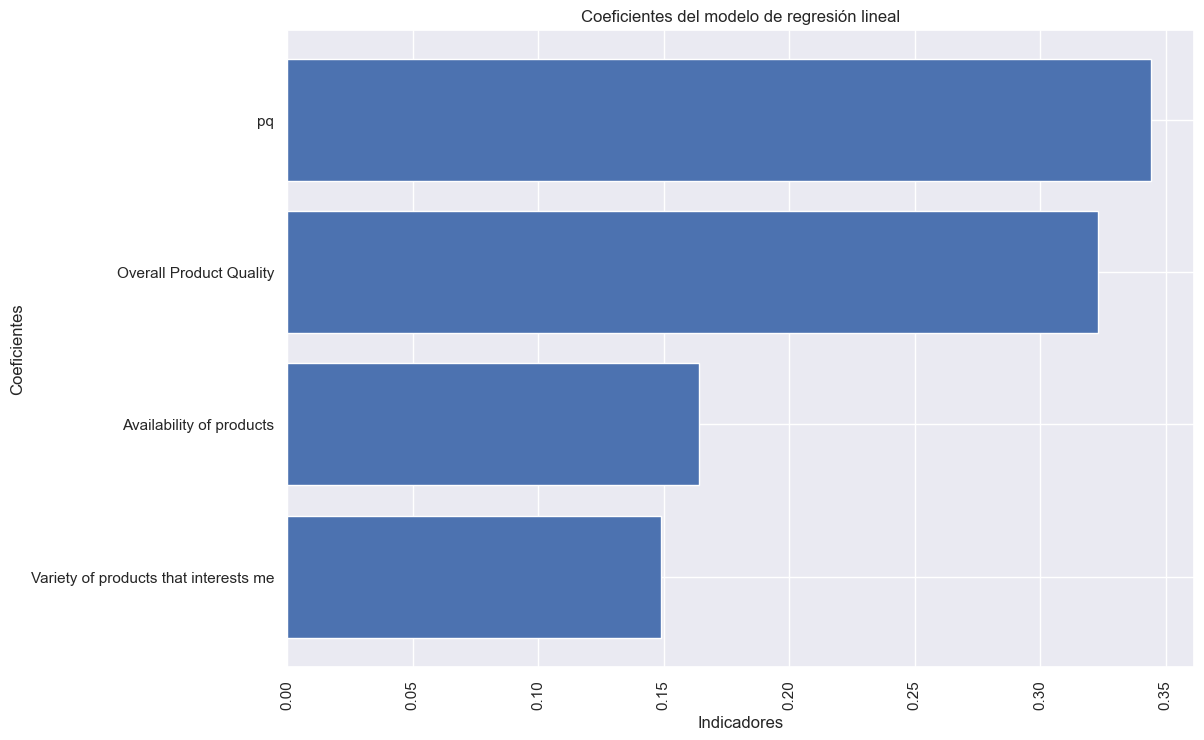

In [76]:
plt.barh(coeficientes.ordenados.index, coeficientes.ordenados)

plt.xlabel('Indicadores')
plt.ylabel('Coeficientes')
plt.title('Coeficientes del modelo de regresión lineal')
plt.xticks(rotation=90)
plt.show()


4. Compare the performance of Amazon with that of Qoo10. 
- How is Qoo10 performing relative to Amazon? 
- What should Amazon do to improve its performance? 
- What should Amazon do to better compete with Qoo10? 


In [112]:
empresa = 'QOO10'
indicador = ['Overall Product Quality', 'Overall Service Quality', 'pq', 'Customer Satisfaction', 'Likelihood to Repurchase', 'Likelihood to recommend', 'Overall experiences SATISFACTION', 'Variety of products that interests me', 'Variety of products that meet my needs', 'Ease of navigating the website or app', 'Ease of finding the products you need', 'Availability of products', 'Attractiveness of promotions and discounts offered', 'Sufficiency of Product information', 'Ease of comparing products', 'Ease of indicating special requests', 'Ease of managing your shopping cart', 'Check-out and payment process', 'Security of website', 'Range of delivery options', 'Ease of tracking your order', 'Time taken to receive the product', 'Products you received were as described on the website', 'Availability of feedback channels', 'Return and exchange policies', 'Satisfaction with the product reviews', 'Satisfaction with the channels available to communicate with the seller(s)']
df_QOO10 = df[df['Companies - Open-end'] == empresa] [indicador]

In [114]:
df_QOO10

,Overall Product Quality,Overall Service Quality,pq,Customer Satisfaction,Likelihood to Repurchase,Likelihood to recommend,Overall experiences SATISFACTION,Variety of products that interests me,Variety of products that meet my needs,Ease of navigating the website or app,...,Check-out and payment process,Security of website,Range of delivery options,Ease of tracking your order,Time taken to receive the product,Products you received were as described on the website,Availability of feedback channels,Return and exchange policies,Satisfaction with the product reviews,Satisfaction with the channels available to communicate with the seller(s)
4,7,6,8,8,6,5,7,8,9,8,...,8,7,6,6,7,8,6,6,7,7
23,7,7,7,7,7,6,8,9,7,8,...,8,7,6,6,7,9,8,7,7,8
24,6,8,8,7,8,7,8,8,8,7,...,6,7,6,6,8,7,6,6,8,10
26,8,8,8,8,6,6,8,7,7,8,...,8,7,8,8,7,7,8,8,7,10
38,7,6,7,8,7,6,8,7,8,8,...,7,8,8,7,7,7,7,8,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1572,9,7,8,8,7,7,8,7,7,8,...,8,9,,,8,7,8,,10,10
1583,9,8,7,8,8,7,8,9,8,9,...,9,6,7,8,10,10,8,8,8,7
1590,8,9,8,7,8,7,8,8,6,7,...,8,6,9,6,10,10,7,,8,7
1592,8,7,8,8,8,9,8,8,6,6,...,7,8,8,,8,7,9,,7,


In [115]:
media_QOO10= df_QOO10.mean()

/var/folders/fd/fxtr52v94x93fjxc0rywkng80000gn/T/ipykernel_16461/2628642110.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  media_QOO10= df_QOO10.mean()


In [116]:
media_QOO10

Overall Product Quality                                   7.610
Overall Service Quality                                   7.505
pq                                                        7.560
Customer Satisfaction                                     7.580
Likelihood to Repurchase                                  7.320
Likelihood to recommend                                   7.290
Overall experiences SATISFACTION                          7.635
Variety of products that interests me                     8.040
Variety of products that meet my needs                    7.550
Ease of navigating the website or app                     7.575
Ease of finding the products you need                     7.755
Availability of products                                  7.590
Attractiveness of promotions and discounts offered        7.585
Sufficiency of Product information                        7.540
Ease of comparing products                                7.460
Ease of managing your shopping cart     

In [117]:
df_comparacion2 = pd.DataFrame({'QOO10': media_QOO10, 'AMAZON': media_amazon})

In [110]:
df_comparacion2

,QOO10,AMAZON
Attractiveness of promotions and discounts offered,NaN,7.620
Availability of products,NaN,7.585
Check-out and payment process,7.675,7.840
Customer Satisfaction,NaN,7.480
Ease of comparing products,NaN,7.645
Ease of finding the products you need,NaN,7.785
Ease of managing your shopping cart,NaN,7.565
Ease of navigating the website or app,7.575,7.655
Likelihood to Repurchase,NaN,7.380
Likelihood to recommend,NaN,7.170


In [119]:
import statsmodels.api as sm
X = df_QOO10[['Overall Product Quality', 'pq', 'Variety of products that interests me', 'Availability of products']]
X = sm.add_constant(X)
y = df_QOO10['Customer Satisfaction']
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Customer Satisfaction   R-squared:                       0.749
Model:                               OLS   Adj. R-squared:                  0.744
Method:                    Least Squares   F-statistic:                     145.2
Date:                   Thu, 08 Jun 2023   Prob (F-statistic):           2.48e-57
Time:                           23:35:14   Log-Likelihood:                -188.45
No. Observations:                    200   AIC:                             386.9
Df Residuals:                        195   BIC:                             403.4
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
=========================================================================================================
                                            coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.0811      0.401      0.202      0.840      -0.709       0.872
Overall Product Quality                   0.3288      0.041      8.110      0.000       0.249       0.409
pq                                        0.3811      0.044      8.609      0.000       0.294       0.468
Variety of products that interests me     0.1036      0.045      2.301      0.022       0.015       0.192
Availability of products                  0.1690      0.042      3.987      0.000       0.085       0.253
==============================================================================
Omnibus:                        3.786   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.425
Skew:                          -0.309   Prob(JB):                        0.180
Kurtosis:                       3.171   Cond. No.                         141.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""